## Exploring the simplified year predictions dataset

Thus far, we've observed that our neural net is only classifying a single class. We hypothesize that this might have to do with the dataset being heavily biased towards a particular handful of classes. This might give us some insight into how we can properly modify our network.

In [28]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

Getting the labels and examples from the csv file

In [30]:
labels = []
examples = []

# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/mnt/c/Users/Aumit/Desktop/YearPredictionMSD.txt/yp.csv"
with open(filename, 'r') as f:
    for line in f:
        content = line.split(",")
        
        labels.append(int(content[0]))

        content.pop(0)

        content = [float(elem) for elem in content]

        # If we want a list of numpy arrays, not necessary
        #npa = np.asarray(content, dtype=np.float64)

        examples.append(content)

In [31]:
total_array = np.array(examples)

In [32]:
total_array

array([[  4.99435700e+01,   2.14711400e+01,   7.30775000e+01, ...,
         -1.82223000e+00,  -2.74634800e+01,   2.26327000e+00],
       [  4.87321500e+01,   1.84293000e+01,   7.03267900e+01, ...,
          1.20494100e+01,   5.84345300e+01,   2.69206100e+01],
       [  5.09571400e+01,   3.18560200e+01,   5.58185100e+01, ...,
         -5.85900000e-02,   3.96706800e+01,  -6.63450000e-01],
       ..., 
       [  4.51285200e+01,   1.26575800e+01,  -3.87201800e+01, ...,
         -6.07171000e+00,   5.39631900e+01,  -8.09364000e+00],
       [  4.41661400e+01,   3.23836800e+01,  -3.34971000e+00, ...,
          2.03224000e+01,   1.48310700e+01,   3.97490900e+01],
       [  5.18572600e+01,   5.91165500e+01,   2.63943600e+01, ...,
         -5.51512000e+00,   3.23560200e+01,   1.21735200e+01]])

In [33]:
total_labels = np.array(labels)

In [34]:
total_labels

array([2001, 2001, 2001, ..., 2006, 2006, 2005])

In [35]:
training_examples = total_array[:10000]

In [36]:
training_labels = total_labels[:10000]

Observing the distribution of classes in the the training labels. Heavily biased towards late 90's/early 2000s, but it isn't entirely skewed. Neural net should still perform well. Maybe we should use random samples as opposed to the first 10000?

(array([  5.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   8.00000000e+00,
          0.00000000e+00,   1.50000000e+01,   0.00000000e+00,
          7.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   9.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+01,
          0.00000000e+00,   5.00000000e+00,   0.00000000e+00,
        

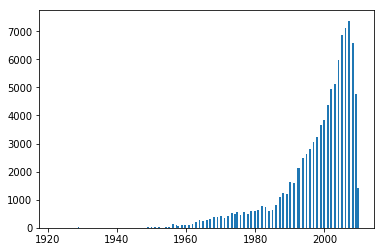

In [78]:
plt.hist(training_labels, bins='auto')

In [79]:
plt.show()

In [40]:
training_labels.shape

(10000,)

The histogram tells us that the first 10,000 training examples heavily favor music from the early 2000s.

(array([   3.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    5.,    0.,    1.,    1.,    0.,
           6.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    6.,    0.,    0.,    0.,    8.,
           0.,    3.,   21.,    0.,    1.,    7.,   27.,   26.,    0.,
          46.,   21.,   18.,   27.,    0.,   56.,   30.,   76.,   44.,
           0.,   48.,   35.,   54.,   38.,    0.,   18.,   55.,   46.,
          59.,    0.,   48.,   62.,   15.,   44.,    0.,   40.,   86.,
         122.,  140.,    0.,  115.,  146.,  159.,  263.,    0.,  230.,
         318.,  228.,  313.,    0.,  348.,  385.,  369.,  456.,    0.,
         507.,  535.,  795.,  711.,    0.,  717.,  774.,  738.,  450.,   98.]),
 array([ 1930. ,  1930.8,  1931.6,  1932.4,  1933.2,  1934. ,  1934.8,
         1935.6,  1936.4,  1937.2,  1938. ,  1938.8,  1939.6,  1940.4,
         1941.2,  1942. ,  1942.8,  1943.6,  1944.4,  1945.2,  1946.

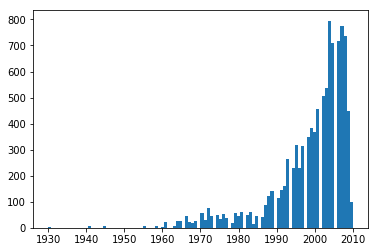

In [53]:
plt.hist(training_labels, bins=100)

The overall training set is also heavily biased towards music from the early the late 90s and early 2000s.

(array([  6.00000000e+00,   0.00000000e+00,   5.00000000e+00,
          7.00000000e+00,   1.90000000e+01,   4.20000000e+01,
          5.20000000e+01,   9.30000000e+01,   4.00000000e+01,
          0.00000000e+00,   3.50000000e+01,   1.10000000e+01,
          6.00000000e+00,   2.90000000e+01,   2.40000000e+01,
          2.50000000e+01,   2.80000000e+01,   1.90000000e+01,
          0.00000000e+00,   3.50000000e+01,   5.20000000e+01,
          3.20000000e+01,   2.40000000e+01,   1.40000000e+01,
          1.50000000e+01,   3.00000000e+01,   2.90000000e+01,
          0.00000000e+00,   5.70000000e+01,   4.30000000e+01,
          6.00000000e+01,   8.30000000e+01,   7.40000000e+01,
          7.70000000e+01,   1.33000000e+02,   1.23000000e+02,
          0.00000000e+00,   2.75000000e+02,   5.65000000e+02,
          5.97000000e+02,   5.83000000e+02,   5.92000000e+02,
          4.24000000e+02,   5.71000000e+02,   6.05000000e+02,
          0.00000000e+00,   9.02000000e+02,   9.45000000e+02,
        

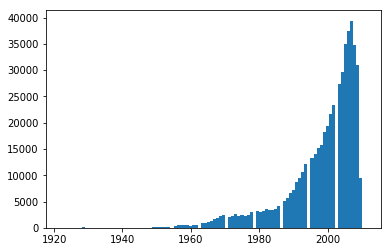

In [54]:
plt.hist(total_labels, bins=100)

Getting test examples from the bottom 1000 array elements

In [52]:
test_examples = total_array[-1000:]
test_labels = total_labels[-1000:]

Train and fit the classifier

In [55]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)   

/usr/lib/python2.7/dist-packages/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:
/usr/lib/python2.7/dist-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
y_pred = clf.predict(test_examples)

Observing the predictions: 2004 is the only represnted example...

(array([ 999.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 2004.  ,  2004.04,  2004.08,  2004.12,  2004.16,  2004.2 ,
         2004.24,  2004.28,  2004.32,  2004.36,  2004.4 ,  2004.44,
         2004.48,  2004.52,  2004.56,  2004.6 ,  2004.64,  2004.68,
      

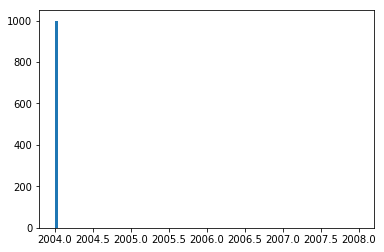

In [57]:
plt.hist(y_pred, bins=100)

Let's compare this to the actual distribution of the test labels. There is still a bias towards what looks like 2004, but overall, there is a distribution here.

(array([   2.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,    3.,
           0.,    0.,    0.,   31.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,    3.,
           1.,    0.,    0.,    0.,    1.,    3.,    6.,    0.,    0.,
           5.,    4.,    0.,    2.,    0.,   11.,    0.,    3.,    1.,
           0.,    0.,    0.,    0.,    2.,    0.,    2.,    0.,    6.,
           9.,    0.,   30.,    0.,   14.,    0.,    0.,    7.,    7.,
          19.,    9.,    0.,   20.,   24.,   33.,    6.,    0.,   14.,
          16.,   28.,   35.,    0.,   49.,   25.,   41.,   56.,    0.,
           1.,   78.,   75.,   40.,    0.,  116.,   64.,   36.,   41.,   15.]),
 array([ 1930. ,  1930.8,  1931.6,  1932.4,  1933.2,  1934. ,  1934.8,
         1935.6,  1936.4,  1937.2,  1938. ,  1938.8,  1939.6,  1940.4,
         1941.2,  1942. ,  1942.8,  1943.6,  1944.4,  1945.2,  1946.

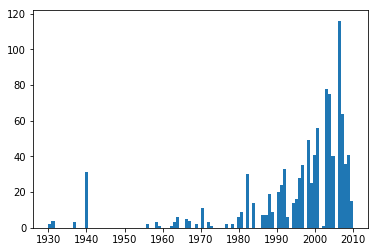

In [75]:
plt.hist(test_labels, bins=100)

Observing the training labels, there is more of a distribution than in the predicted labels. What could be causing the network to skew towards a particular class even though it is being trained on a decent distribution? 

(array([   3.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    5.,    1.,    1.,    0.,    6.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    6.,    0.,    0.,    0.,    8.,    0.,    3.,
          21.,    0.,    1.,    7.,   27.,   26.,   46.,   21.,    0.,
          18.,   27.,   56.,   30.,   76.,    0.,   44.,   48.,   35.,
          54.,   38.,    0.,   18.,   55.,   46.,   59.,   48.,   62.,
           0.,   15.,   44.,   40.,   86.,  122.,    0.,  140.,  115.,
         146.,  159.,  263.,    0.,  230.,  318.,  228.,  313.,  348.,
         385.,    0.,  369.,  456.,  507.,  535.,  795.,    0.,  711.,
         717.,  774.,  738.,  450.,   98.]),
 array([ 1930.        ,  1930.84210526,  1931.68421053,  1932.52631579,
         1933.36842105,  1934.21052632,  1935.05263158,  1935.89473684,
         1936.73684211,  1937.57894737,  1938.42105263,  1939.26315789,
         1940.10526316,  1940

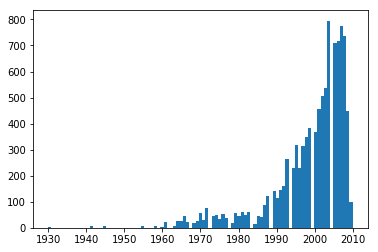

In [61]:
plt.hist(training_labels, bins=95)

Alpha is the regularization parameter... how about a large alpha, like 10?

In [62]:
clf = MLPClassifier(solver='sgd', alpha=10,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)                         


MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
y_pred = clf.predict(test_examples)

More of the same. A class in the 2000s is still being selected for more than anything else.

(array([ 998.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([ 2005.        ,  2005.03157895,  2005.06315789,  2005.09473684,
         2005.12631579,  2005.15789474,  2005.18947368,  2005.22105263,
         2005.25263158,  2005.28421053,  2005.31578947,  2005.34736842,
         2005.37894737,  2005

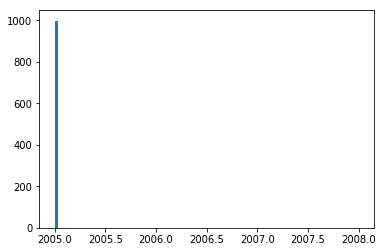

In [64]:
plt.hist(y_pred, bins=95)

How about a small alpha-- alpha = 0.0001

In [65]:
clf = MLPClassifier(solver='sgd', alpha=0.0001,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)     

/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=100, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [66]:
y_pred = clf.predict(test_examples)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  1000.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([ 2003.5       ,  2003.51052632,  2003.52105263,  2003.53157895,
         2003.54210526,  2003.55263158,  2003.56315789,  2003.57368421

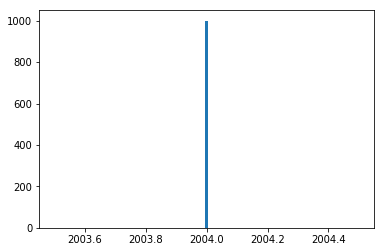

In [67]:
plt.hist(y_pred, bins = 95)

Let's increase the number of training examples to 100,000.

In [68]:
training_examples = total_array[:100000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:100000]

In [69]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1)

clf.fit(training_examples, training_labels)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [70]:
y_pred = clf.predict(test_examples)

No improvement. Still favoring a single class.

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  1000.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([ 2006.5       ,  2006.51052632,  2006.52105263,  2006.53157895,
         2006.54210526,  2006.55263158,  2006.56315789,  2006.57368421

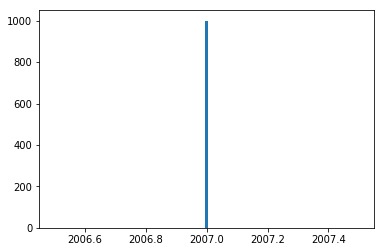

In [71]:
plt.hist(y_pred, bins=95)

How about an adaptive learning rate? By default, MLP-classifier uses a constant learning rate. To read more about learning rates visit: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [72]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100, 100, 100, 100), random_state=1, learning_rate="adaptive")

clf.fit(training_examples, training_labels) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [73]:
y_pred = clf.predict(test_examples)

More of the same. More training data + an adaptive learning rate doesn't seem to work.

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,  1000.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([ 2006.5       ,  2006.51052632,  2006.52105263,  2006.53157895,
         2006.54210526,  2006.55263158,  2006.56315789,  2006.57368421

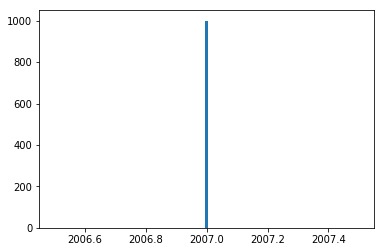

In [74]:
plt.hist(y_pred, bins = 95)

Let's observe the actual count of each class in the full dataset. These numbers confirm what the histograms told us-- most of the labels are for music from the late 90s and early 2000s. Even so, the data isn't so skewed that a neural net is completely ineffective... there is more to this story that we are not seeing yet.

In [76]:
label_counts = {}

for item in labels:
    if item not in label_counts:
        label_counts[item] = 1
    else:
        label_counts[item] += 1

In [77]:
label_counts

{1922: 6,
 1924: 5,
 1925: 7,
 1926: 19,
 1927: 42,
 1928: 52,
 1929: 93,
 1930: 40,
 1931: 35,
 1932: 11,
 1933: 6,
 1934: 29,
 1935: 24,
 1936: 25,
 1937: 28,
 1938: 19,
 1939: 35,
 1940: 52,
 1941: 32,
 1942: 24,
 1943: 14,
 1944: 15,
 1945: 30,
 1946: 29,
 1947: 57,
 1948: 43,
 1949: 60,
 1950: 83,
 1951: 74,
 1952: 77,
 1953: 133,
 1954: 123,
 1955: 275,
 1956: 565,
 1957: 597,
 1958: 583,
 1959: 592,
 1960: 424,
 1961: 571,
 1962: 605,
 1963: 902,
 1964: 945,
 1965: 1120,
 1966: 1377,
 1967: 1718,
 1968: 1867,
 1969: 2210,
 1970: 2349,
 1971: 2131,
 1972: 2288,
 1973: 2596,
 1974: 2184,
 1975: 2482,
 1976: 2179,
 1977: 2502,
 1978: 2926,
 1979: 3108,
 1980: 3101,
 1981: 3162,
 1982: 3597,
 1983: 3386,
 1984: 3368,
 1985: 3578,
 1986: 4219,
 1987: 5122,
 1988: 5611,
 1989: 6670,
 1990: 7256,
 1991: 8647,
 1992: 9543,
 1993: 10525,
 1994: 12121,
 1995: 13257,
 1996: 14130,
 1997: 15182,
 1998: 15814,
 1999: 18238,
 2000: 19285,
 2001: 21590,
 2002: 23451,
 2003: 27382,
 2004: 29607

The above confirms our intuition that the dataset is biased towards music from the 90s and 2000s.